In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
import os
sys.path.append(os.path.join('..', '..'))
from vowpal_wabbit import VowpalWabbitClassifier

In [3]:
quora = pd.read_csv('../data/.input/train.csv')

In [4]:
quora_train, quora_test = train_test_split(quora, random_state=42)
quora_train_data = quora_train.question_text
quora_train_labels = quora_train.target * 2.0 - 1.0
quora_test_data = quora_test.question_text
quora_test_labels = quora_test.target * 2.0 - 1.0

In [5]:
def to_vw_format(document, label=None):
    return str(label or '') + ' |text ' + ' '.join(re.findall('\w{3,}', document.lower())) + '\n'

In [6]:
!!mkdir .input
with open('.input/train.vw', 'w', encoding='utf-8') as vw_train_data:
    for text, target in zip(quora_train_data, quora_train_labels):
        vw_train_data.write(to_vw_format(text, target))
with open('.input/test.vw', 'w', encoding='utf-8') as vw_test_data:
    for text in quora_test_data:
        vw_test_data.write(to_vw_format(text))

In [7]:
fit_params = {
        '--loss_function': 'logistic',
        '-b': 27,
}
vw = VowpalWabbitClassifier(working_dir = '.input', debug = True, fit_params = fit_params)
vw.fit('.input/train.vw')

final_regressor = .input\d6cdb542-e6d1-11e8-84f4-0013efb00144.model
Num weight bits = 27
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = .input/train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       15
0.652329 0.611511            2            2.0  -1.0000  -0.1705        6
0.573442 0.494555            4            4.0  -1.0000  -0.6636        8
0.466002 0.358561            8            8.0  -1.0000  -1.0173       16
0.451681 0.437360           16           16.0  -1.0000  -1.2570       10
0.348959 0.246237           32           32.0  -1.0000  -1.7525        6
0.303475 0.257992           64           64.0  -1.0000  -1.1768        6
0.267824 0.232172          128          128.0  -1.0000  -2.4454        6
0.256853 0.245882          256          256.0  -1.0000  -4.5194    

VowpalWabbitClassifier(debug=None, fit_params=None, vw_path=None,
            working_dir=None)

In [8]:
quora_test_pred = vw.predict('.input/test.vw')

only testing
predictions = .input\d6cdb542-e6d1-11e8-84f4-0013efb00144_predictions.txt
Num weight bits = 27
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = .input/test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown  -7.7824       13
    n.a.     n.a.            2            2.0  unknown  -4.7824        9
    n.a.     n.a.            4            4.0  unknown  -9.6990       11
    n.a.     n.a.            8            8.0  unknown  -4.8783       11
    n.a.     n.a.           16           16.0  unknown  -4.8681        8
    n.a.     n.a.           32           32.0  unknown  -3.7108        8
    n.a.     n.a.           64           64.0  unknown  -6.3903       11
    n.a.     n.a.          128          128.0  unknown  -3.8323       13
    n.a.     n.a.          256          256.0  un

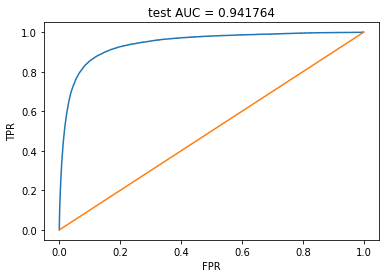

In [9]:
quora_test_prediction = vw.predict_proba_

auc = roc_auc_score(quora_test_labels, quora_test_prediction)
curve = roc_curve(quora_test_labels, quora_test_prediction)


plt.plot(curve[0], curve[1]);
plt.plot([0,1], [0,1])
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('test AUC = %f' % (auc)); plt.axis([-0.05,1.05,-0.05,1.05]);

In [10]:
print('accuracy', accuracy_score(quora_test_labels, quora_test_pred))
print('precision', precision_score(quora_test_labels, quora_test_pred))
print('recall', recall_score(quora_test_labels, quora_test_pred))
print('f1', f1_score(quora_test_labels, quora_test_pred))
confusion_matrix(quora_test_labels, quora_test_pred)

accuracy 0.9534255553071531
precision 0.6998394863563403
recall 0.41546717488339435
f1 0.5213997985901309


array([[303039,   3553],
       [ 11655,   8284]], dtype=int64)